In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools


In [5]:
importlib.reload(ExperimentClass)
manip = ExperimentClass.Experiment("20230519_Ek", "JTS", local = "IBPC" , diff_xaxis = True)

In [13]:
manip.Data

,E 11,E 12,E 13,E 14,E 15,E 21,E 22,E 23,E 24,E 25,...,E 191,E 192,E 193,E 194,E 195,E 201,E 202,E 203,E 204,E 205
0,-275.2013,-896.8610,-1411.393,-1528.584,-1676.177,-555.0464,-142.6679,290.5199,529.9633,1105.3380,...,-3968.100,-3437.713,-2703.491,-2090.626,-1483.752,29.17720,622.7498,1163.017,1654.018,2364.043
1,-229.3578,-1075.1040,-1513.144,-1457.102,-1528.740,-611.1846,-321.0355,265.0897,728.9224,1192.1740,...,-3940.072,-3462.698,-2660.506,-2096.100,-1508.956,102.15000,715.3981,1197.547,1751.484,2393.695
2,-208.9704,-933.0071,-1309.754,-1538.932,-1691.806,-560.3098,-178.4076,275.2574,545.3619,1151.5340,...,-3896.293,-3366.741,-2748.322,-2018.286,-1591.086,107.01430,642.2108,1153.509,1663.910,2378.868
3,-254.9460,-1096.2680,-1544.185,-1452.155,-1529.364,-626.5280,-265.0357,336.4944,672.9200,1197.7570,...,-3959.529,-3468.574,-2612.630,-2121.035,-1416.610,72.97849,691.1321,1119.439,1684.190,2389.062
4,-152.9832,-989.1903,-1381.666,-1508.972,-1661.570,-540.2651,-168.2815,280.4406,520.1428,1156.8650,...,-3917.275,-3474.115,-2675.618,-2067.724,-1523.559,29.19140,696.2026,1241.480,1698.793,2394.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-788.6920,-1792.6650,-2017.822,-2145.637,-2124.719,-1474.3530,-1034.7300,-512.1377,-230.4147,322.6137,...,-3690.848,-3222.179,-2472.635,-1823.961,-1133.920,410.55720,938.4164,4721.408,1916.495,2799.492
997,-978.3833,-1664.6180,-2160.778,-2053.041,-2135.177,-1387.6090,-962.9174,-537.5793,-163.8337,353.2303,...,-3578.412,-3216.031,-2482.408,-1852.576,-1089.825,483.77640,1031.3810,3782.991,1857.646,2716.966
998,-814.6326,-1802.5400,-2058.793,-2099.549,-2124.501,-1464.5640,-1008.9110,-491.6018,-235.5592,297.0398,...,-3626.588,-3289.988,-2472.876,-1769.825,-1128.922,469.11650,938.5082,2921.348,1881.904,2863.565
999,-931.9951,-1679.8110,-2191.725,-2032.770,-2073.521,-1387.8930,-978.2831,-537.5244,-168.9881,389.1848,...,-3681.072,-3246.626,-2398.632,-1862.534,-1192.688,405.59030,967.8365,2453.088,1936.430,2711.815


In [6]:

Vitesse_photochimie_PWM_list = ["E11", "E21", "E31", "E41", "E51", "E61", "E71", "E81", "E91", "E101", 
                                "E112", "E121", "E131", "E141" , "E151", "E161", "E171", "E181", "E191", "E201"]

In [7]:

manip.sub_experiments("Vitesse_photochimie_PWM", Vitesse_photochimie_PWM_list)

In [6]:
#names_list = ["ECS_flash", "ECS_pulse", "Vitesse_photochimie_JTS", "Vitesse_photochimie_PWM", "FvFm", "Bode_diagram"]

In [7]:
#manip.get_all_sub_experiments(names_list, keys_list)

In [30]:
Vitesse_photochimie_PWM = ExperimentClass.Experiment("Vitesse_photochimie_PWM", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230519_Ek")

In [19]:
Vitesse_photochimie_PWM.Time

0          1.01
1          2.01
2          3.01
3          4.01
4          5.01
         ...   
996     8598.01
997     8599.01
998     8600.01
999     8601.01
1000    8602.01
Name: Time, Length: 1001, dtype: float64

In [32]:
norm_data = []
for i in Vitesse_photochimie_PWM_list:
    Vitesse_photochimie_PWM.Data[i] = Vitesse_photochimie_PWM.Data[i]-np.mean(Vitesse_photochimie_PWM.Data[i][190:200])

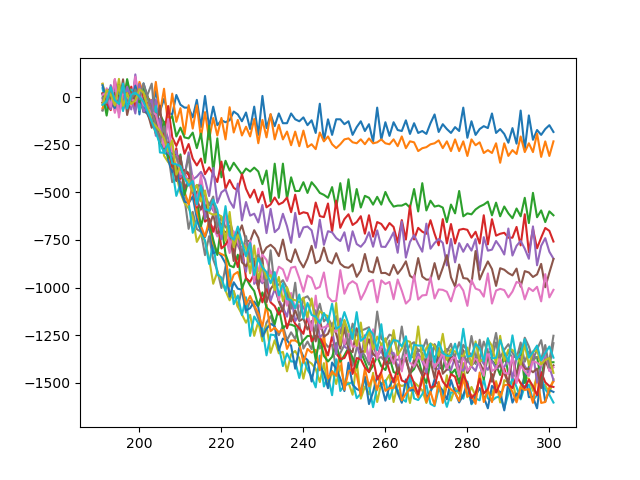

In [33]:
plt.figure()
for i in Vitesse_photochimie_PWM_list:
    plt.plot(Vitesse_photochimie_PWM.Time[190:300], Vitesse_photochimie_PWM.Data[i][190:300], label = i)

# $E_{k}$ determination using PWM

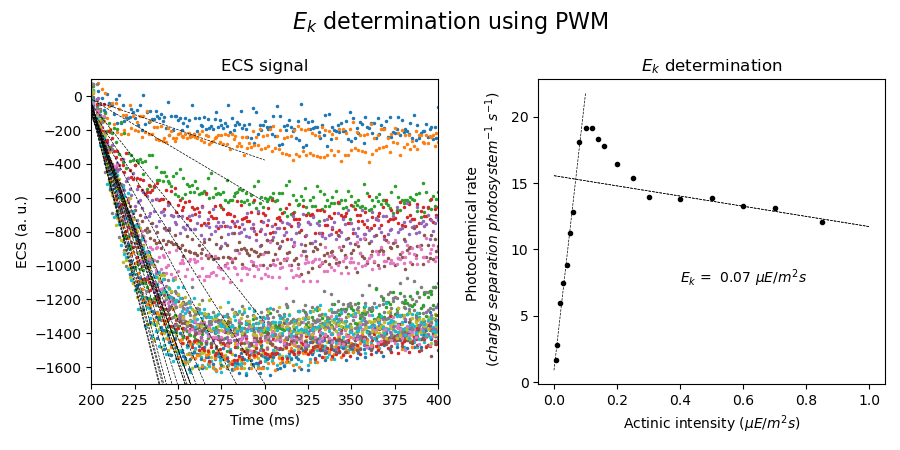

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,4.5))
figure_name = "$E_{k}$ determination using PWM"
fig.suptitle(figure_name, fontsize = 16)

PWM_rel = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.85]
record_list = Vitesse_photochimie_PWM_list
Intensity = 1326 * np.asarray(PWM_rel) + 11.9
Intensity = PWM_rel

for i, k in enumerate(record_list) :
    ax1.plot(Vitesse_photochimie_PWM.Time,Vitesse_photochimie_PWM.Data[k], 'o', label = "$PWM_{rel}$ = " + f"{PWM_rel[i]}", 
             markersize = 1.5, linewidth = 1)

#ax1.legend(prop={'size': 6})
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([200,400])
ax1.set_ylim([-1700,100])

start = 100
stop = 300
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(record_list):
    xdata = Vitesse_photochimie_PWM.Time[202:230]
    ydata = Vitesse_photochimie_PWM.Data[k][202:230]
    popt, x, y =  tools.lin_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(-param[i][0])
    

ax2.plot(Intensity, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt1, x, y =  tools.lin_fit(Intensity[0:8], 1000*(np.array(vitesse)/2170)[0:8], 0, 0.1, 50)
ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

popt2, x, y =  tools.lin_fit(Intensity[15:], 1000*(np.array(vitesse)/2170)[15:], 0,1, 50)
ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = (popt2[1] - popt1[1])/(popt1[0] - popt2[0])

ax2.plot(x,y, '--', color ='k', linewidth = 0.5)


ax2.text( 0.4, 7.5, "$E_{k}$ = " + f"{Ek : .2f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($µE/m^{2}s$)")
ax2.set_ylabel("Photochemical rate \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = manip.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

In [14]:
def plot_spectrum(Time, Data, Rec, Actinic_freq, Offset, Amp, nb_period_show, plot_phase = True):
    figure_name = f"{Rec}, F = {Actinic_freq} Hz, Amplitude = {Offset : .2f}" + "$E_{k}$" + f" ± {Amp : .2f}" + "$E_{k}$, steady state"
    
    if plot_phase:
    
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (9, 3))
        fig.suptitle(figure_name)
        ax1.plot(Time, Data/1000)
        ax1.set_xlim([0, min(nb_period_show*(1/Actinic_freq), max(Time))])
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("ECS (x $10^{3}$ a. u.)")

        F, A, P =  tools.FFT(Time, Data)
        peaks, _ = tools.find_peaks(A, threshold= max(A)/100)

        ax2.plot(F, A/10000)
        ax2.plot(F[peaks],A[peaks]/10000, 'x', markersize = 3 )
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Magnitude x $10^{4}$")
        ax2.set_xlim([0, min(F[peaks[-1]]+0.1, max(F))])
        
        F_harmonics = F[peaks]
        P_harmonics = P[peaks]*180/np.pi
        P_harmonics = P_harmonics - P_harmonics[0]
        P_harmonics = np.where(P_harmonics < -180, P_harmonics + 360, P_harmonics)
        P_harmonics = np.where(P_harmonics > 180, P_harmonics - 360, P_harmonics)

        ax3.plot(F_harmonics,P_harmonics, 'o',  markersize = 4)
        ax3.set_xlabel("Frequency (Hz)")
        ax3.set_ylabel("Phase (degrees)")
        ax3.set_ylim([-200, 200])
        y_tick_labels = ['-180°','','-90°','', '0°','', '90°','', '180°']
        ax3.set_yticks(np.linspace(-180, 180, len(y_tick_labels)))
        ax3.set_yticklabels(y_tick_labels)
        ax3.grid(which = 'both')

        fig.tight_layout()

        return fig
    
    else:
        
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (6, 3))
        fig.suptitle(figure_name)
        ax1.plot(Time, Data/1000)
        ax1.set_xlim([0, min(nb_period_show*(1/Actinic_freq), max(Time))])
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("ECS (x $10^{3}$ a. u.)")

        F, A, P =  tools.FFT(Time, Data)
        peaks, _ =  tools.find_peaks(A, threshold= max(A)/100)

        ax2.plot(F, A/10000)
        ax2.plot(F[peaks],A[peaks]/10000, 'x', markersize = 3 )
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Magnitude x $10^{4}$")
        ax2.set_xlim([0, min(F[peaks[-1]]+0.1, max(F))])

        fig.tight_layout()

        return fig
    

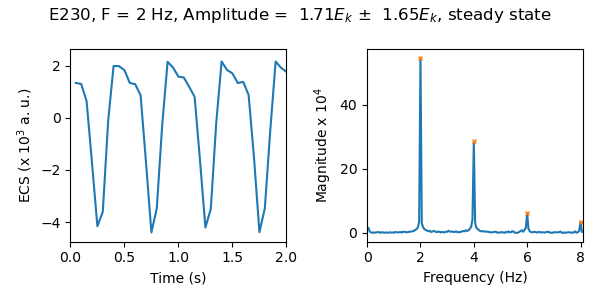

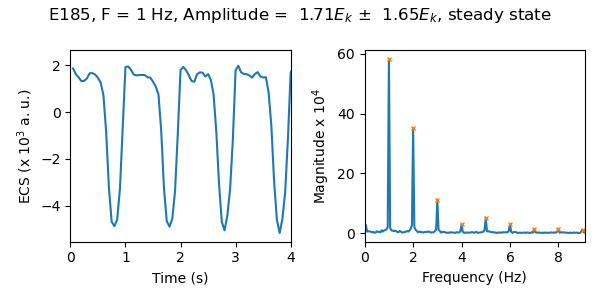

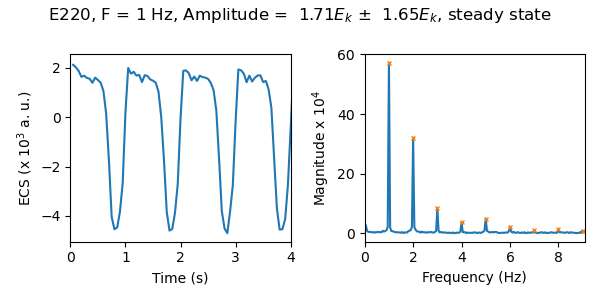

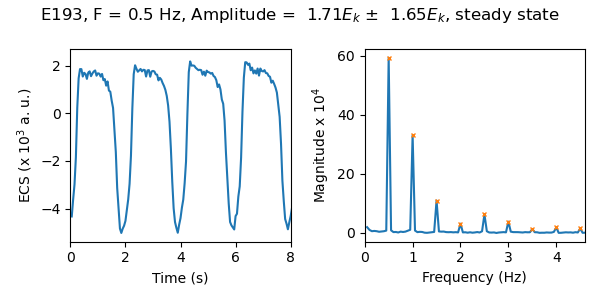

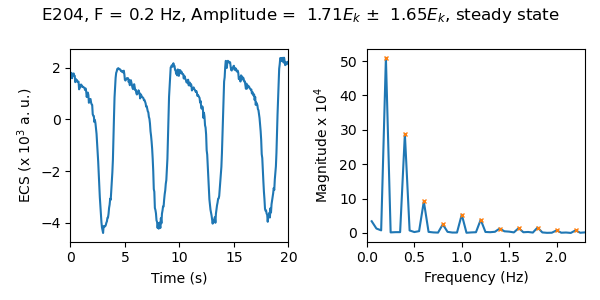

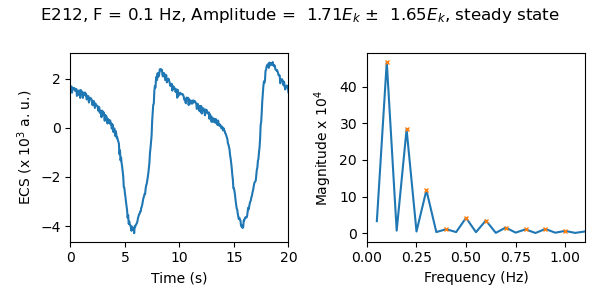

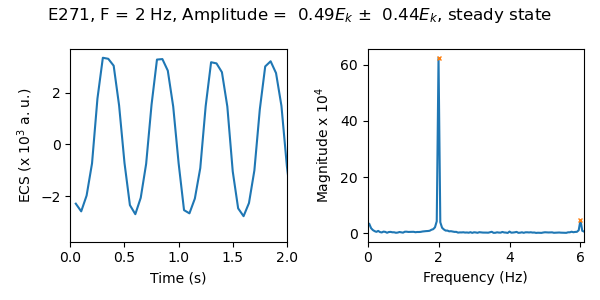

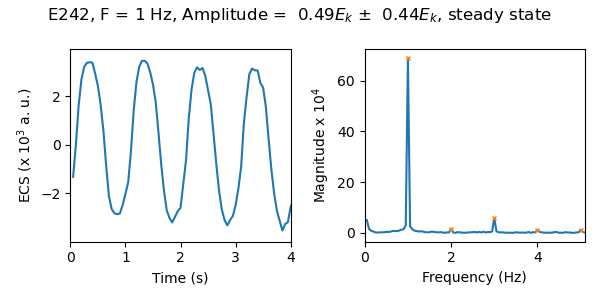

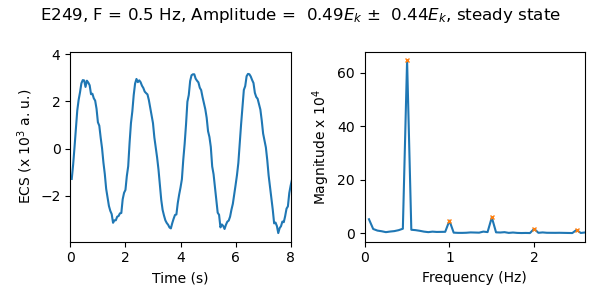

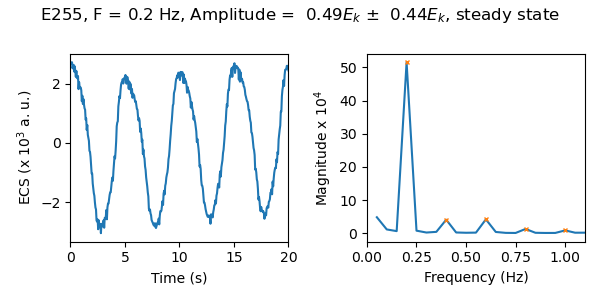

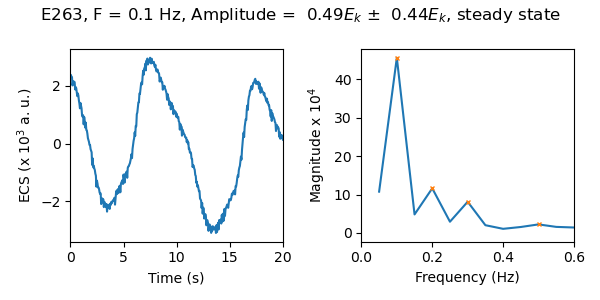

In [15]:
Time = Bode_diagram.Time/1000
record_list = ["E230", "E185", "E220", "E193", "E204", "E212", "E271", "E242", "E249", "E255", "E263"]
Actinic_freq = [2,1,1,0.5,0.2,0.1,2,1,0.5,0.2,0.1]
nb_period_show = 4
Offset = [0.3,0.3,0.3,0.3,0.3,0.3,0.08,0.08,0.08,0.08,0.08]
Amp = [0.29,0.29,0.29,0.29,0.29,0.29,0.07,0.07,0.07,0.07,0.07]
Offset_Ek = (1326 * np.asarray(Offset) + 11.9)/240
Amp_Ek = (1326 * np.asarray(Amp) + 11.9)/240

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

for i, k in enumerate(record_list):
    fig = plot_spectrum(Time, Bode_diagram.Data[k], k, Actinic_freq[i], Offset_Ek[i], Amp_Ek[i], nb_period_show, plot_phase=False)
    figure_name = f"{k}, F = {Actinic_freq[i]} Hz, Amplitude = {Offset[i]} ± {Amp[i]}" + " $PWM_{rel}$, steady state"
    fig.savefig(fig_folder + "/" + figure_name + ".png")

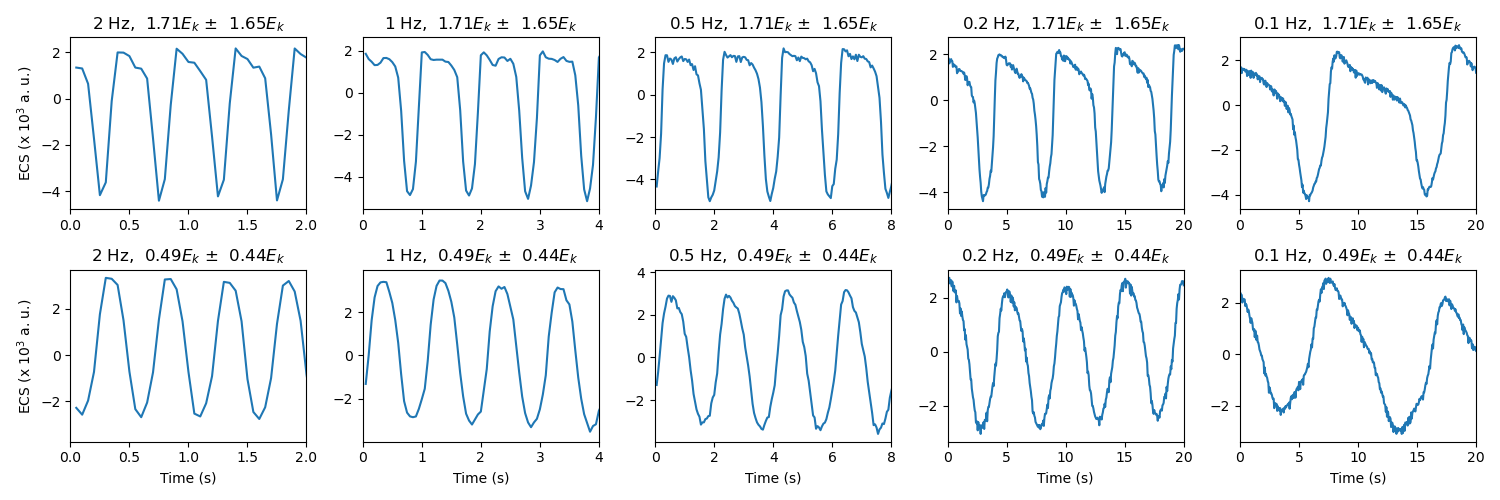

In [16]:
Time = Bode_diagram.Time/1000
record_list = ["E230", "E185", "E193", "E204", "E212", "E271", "E242", "E249", "E255", "E263"]
Actinic_freq = [2,1,0.5,0.2,0.1,2,1,0.5,0.2,0.1]
nb_period_show = 4
Offset = [0.3,0.3,0.3,0.3,0.3,0.08,0.08,0.08,0.08,0.08]
Amp = [0.29,0.29,0.29,0.29,0.29,0.07,0.07,0.07,0.07,0.07]
Offset_Ek = (1326 * np.asarray(Offset) + 11.9)/240
Amp_Ek = (1326 * np.asarray(Amp) + 11.9)/240

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

    
for i, ax in enumerate(axs.ravel()):
    ax.plot()
    ax.plot(Bode_diagram.Time/1000, Bode_diagram.Data[record_list[i]]/1000)
    ax.set_xlim([0, min(nb_period_show*(1/Actinic_freq[i]), max(Bode_diagram.Time/1000))])
    if i > 4:
        ax.set_xlabel("Time (s)")
    if i == 0 or i == 5:
        ax.set_ylabel("ECS (x $10^{3}$ a. u.)")
    ax.set_title(f"{Actinic_freq[i]} Hz, {Offset_Ek[i] : .2f}" + "$E_{k}$" + f" ± {Amp_Ek[i] : .2f}" + "$E_{k}$")
    
fig.tight_layout()
fig.savefig(fig_folder + "/" + "all_freq" + ".png")

In [18]:

importlib.reload(ExperimentClass)
manip = ExperimentClass.Experiment("20230321_Ek_FvFm_Sinus", "JTS", local = "IBPC" , diff_xaxis = True)



C:\Users\Orlando\AppData\Local\Temp\ipykernel_38836\607460493.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1) = plt.subplots(1,1, figsize = (8,8))


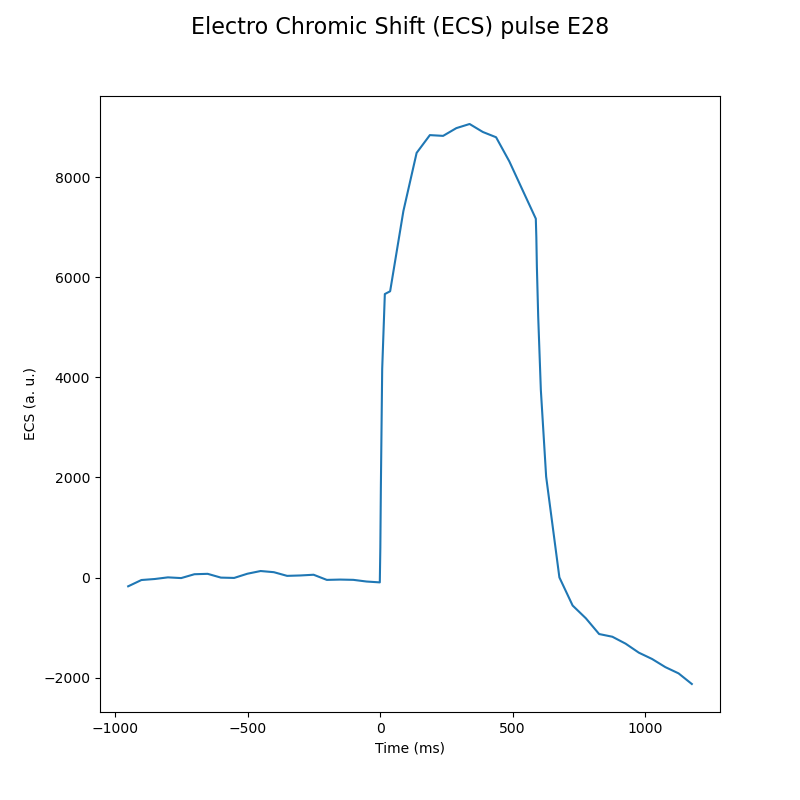

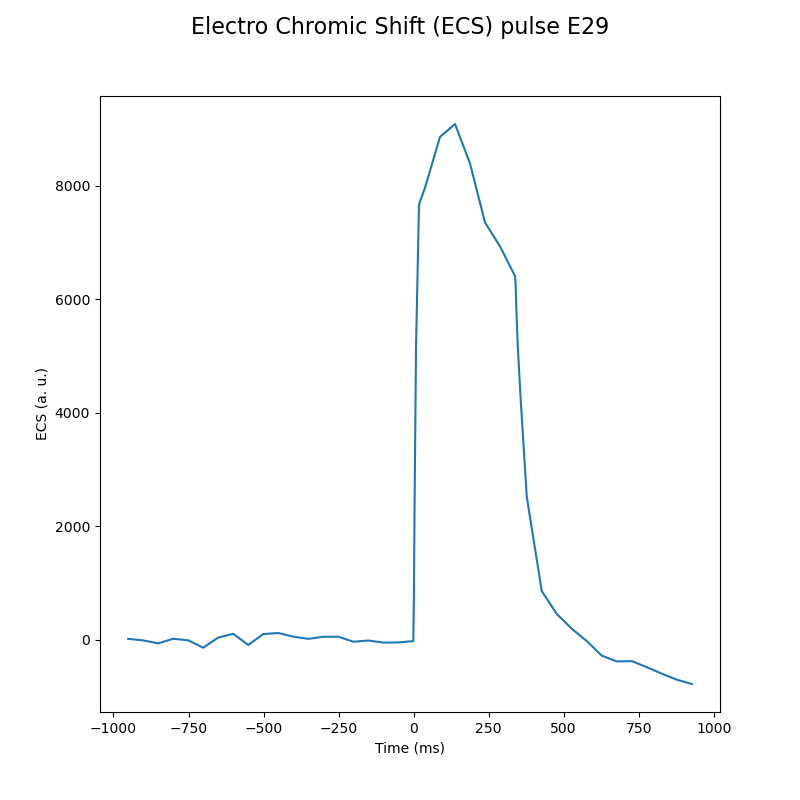

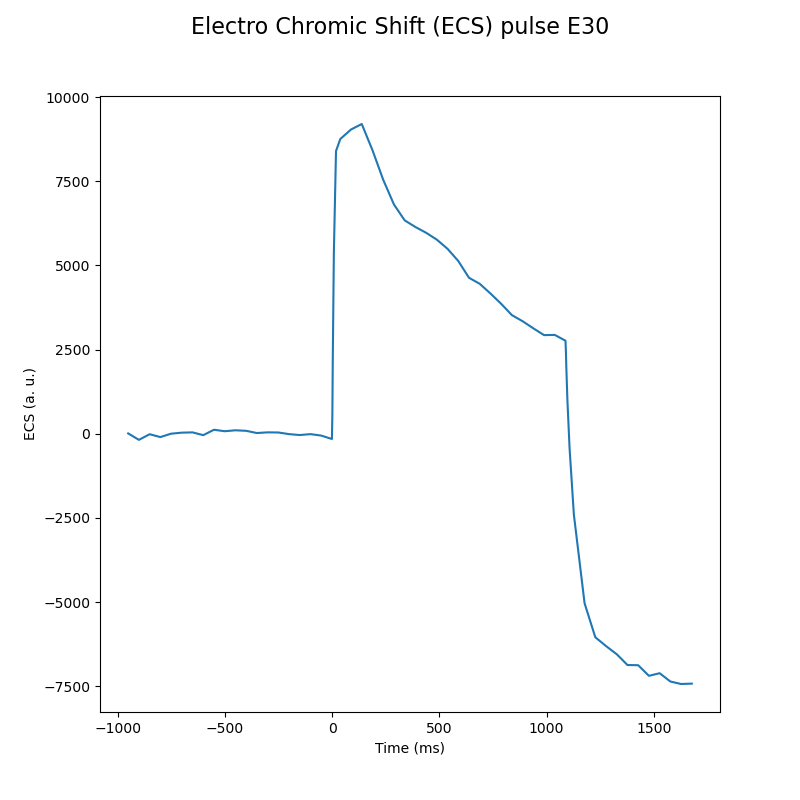

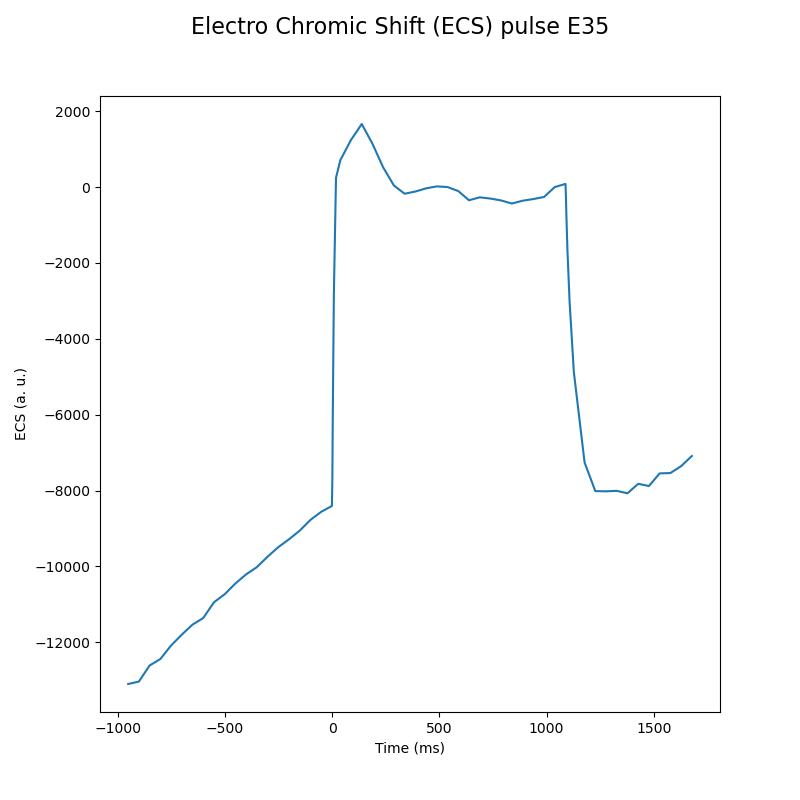

In [19]:
for i in ECS_pulse_list:
    manip.extract_recording(i)
    ECS_pulse = ExperimentClass.Experiment(i, "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
    fig, (ax1) = plt.subplots(1,1, figsize = (8,8))
    figure_name = f"Electro Chromic Shift (ECS) pulse {i}"
    fig.suptitle(figure_name, fontsize = 16)

    ax1.plot(ECS_pulse.Time,ECS_pulse.Data.iloc[:,0])
    ax1.set_xlabel("Time (ms)")
    ax1.set_ylabel("ECS (a. u.)")

    fig_folder = Bode_diagram.path + "/Figures"
    if not os.path.isdir(fig_folder):
        os.mkdir(fig_folder)

    fig.savefig(fig_folder + "/" + figure_name + ".png")

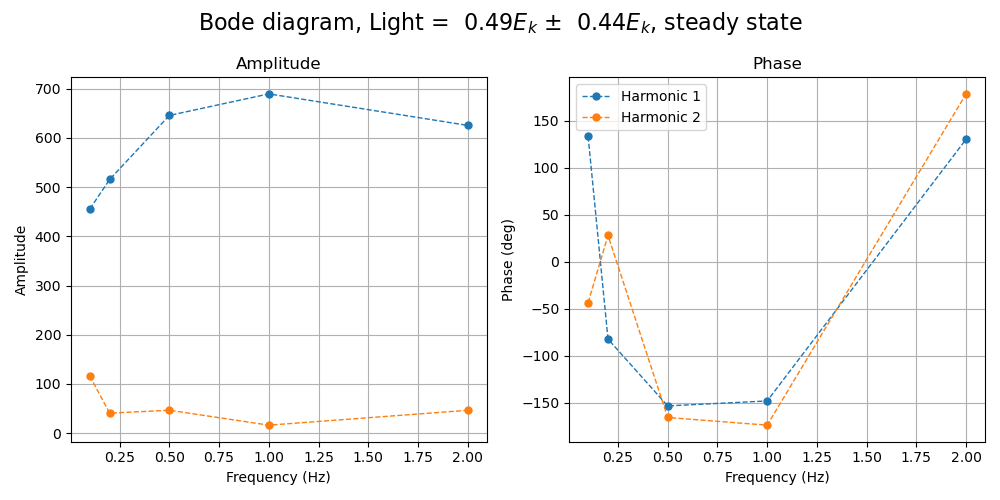

In [59]:
importlib.reload(tools)

rec_high_light = ["E230", "E185", "E193", "E204", "E212"][::-1]
rec_low_light = ["E271", "E242", "E249", "E255", "E263"][::-1]

light = "low"

Time = Bode_diagram.Time/1000
Actinic_freq = [0.1,0.2,0.5,1,2]
nb_period_show = 4
if  light == "high":
     record_list = rec_high_light
     Offset = 0.3
     Amp = 0.29

else:
    record_list = rec_low_light
    Offset = 0.08
    Amp = 0.07

Offset_Ek = (1326 * Offset + 11.9)/240
Amp_Ek = (1326 * Amp + 11.9)/240



Signal_list = []
Time_list = []

for i in record_list:
    Signal_list.append(Bode_diagram.Data[i]/1000)
    Time_list.append(Time)

def plot_bode(Actinic_freq,Time_list, Signal_list):

    Frequency, Amplitude, Phase = tools.get_bode_diagram(Actinic_freq,Time_list, Signal_list, threshold = 100)

    fig, ax = plt.subplots(1,2, figsize = (10,5))

    figure_name = f"Bode diagram, Light = {Offset_Ek : .2f}" + "$E_{k}$" + f" ± {Amp_Ek : .2f}" + "$E_{k}$, steady state"

    fig.suptitle(figure_name, fontsize = 16)

    for i in range(0,10):
            try:
                ax[0].plot(Actinic_freq, [sub_list[i] if sub_list.any() else None for sub_list in Amplitude], 'o--', label = f'Harmonic {i+1}', markersize = 5, linewidth = 1)
                ax[1].plot(Actinic_freq, [sub_list[i] if sub_list.any() else None for sub_list in Phase], 'o--', label = f'Harmonic {i+1}', markersize = 5, linewidth = 1)
            except:
                pass


    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Phase (deg)')
    ax[0].set_title('Amplitude')
    ax[1].set_title('Phase')

    ax[0].grid()
    ax[1].grid()

    ax[1].legend()

    fig.tight_layout()

    fig.savefig(fig_folder + "/" + figure_name + ".png")

plot_bode(Actinic_freq,Time_list, Signal_list)


In [23]:
importlib.reload(tools)

high_light = ["E230", "E185", "E193", "E204", "E212"][::-1]
low_light = ["E271", "E242", "E249", "E255", "E263"][::-1]

Time = Bode_diagram.Time/1000
record_list = low_light
Actinic_freq = [0.1,0.2,0.5,1,2]
nb_period_show = 4
Offset = 0.3
Amp = 0.29
Offset_Ek = (1326 * Offset + 11.9)/240
Amp_Ek = (1326 * Amp + 11.9)/240

Signal_list = []
Time_list = []

for i in record_list:
    Signal_list.append(Bode_diagram.Data[i]/1000)
    Time_list.append(Time)

def plot_bode(Actinic_freq,Time_list, Signal_list, ax = None):

    Frequency, Amplitude, Phase = tools.get_bode_diagram(Actinic_freq,Time_list, Signal_list, threshold = 100)

    if ax == None:
         ax = plt.gca()

    for i in range(0,10):
            try:
                ax[0].plot(Actinic_freq, [sub_list[i] if sub_list.any() else None for sub_list in Amplitude], 'o--', label = f'Harmonic {i+1}', markersize = 5, linewidth = 1)
                ax[1].plot(Actinic_freq, [sub_list[i] if sub_list.any() else None for sub_list in Phase], 'o--', label = f'Harmonic {i+1}', markersize = 5, linewidth = 1)
            except:
                pass


    ax[0].set_xlabel('Frequency (Hz)')
    ax[0].set_ylabel('Amplitude')
    ax[1].set_xlabel('Frequency (Hz)')
    ax[1].set_ylabel('Phase (deg)')
    ax[0].set_title('Amplitude')
    ax[1].set_title('Phase')

    ax[0].grid()
    ax[1].grid()

    ax[1].legend()

    fig.tight_layout()

plot_bode(Actinic_freq,Time_list, Signal_list)

[0.1]

In [48]:
Frequency


[array([0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  , 1.1 ,
        1.2 , 1.3 , 1.4 , 1.55, 1.7 , 1.9 , 2.05, 2.3 , 2.5 , 2.6 , 2.7 ,
        2.85, 3.25, 3.4 , 3.85, 4.05, 4.15, 5.25, 5.35, 5.45, 5.75, 5.85,
        5.95, 6.1 , 6.35, 6.45, 6.65, 7.15, 7.5 , 7.7 , 8.05, 8.55, 9.3 ,
        9.4 , 9.6 , 9.7 ])]